# <p style="text-align:center" color="red"><span style="color:red">Ta-Lib suite of financial data indicators</span></p>

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/labrijisaad/Prediction-du-cours-de-Bourse"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Notebook made by [@labriji_saad](https://www.linkedin.com/in/labrijisaad/) during the data science class.

In [1]:
%%capture

!pip install yfinance
!pip install mplfinance

In [2]:
%%capture

import warnings
warnings.filterwarnings("ignore")

# Data analysis and processing
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #Chart Drawing Kit
import datetime #Time Processing Suite
import talib
import mplfinance as mpf

# WebCrawler
import pandas_datareader.data as web
import yfinance as yf  # Yahoo Finance

# Data normalization 
from sklearn.preprocessing import MinMaxScaler  


# Keras & sklearn imports
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping


from math import sqrt
from keras.utils.vis_utils import plot_model   # plot_model 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
start = datetime.datetime(2018,4,1) # Set start time
end = datetime.datetime(2021,7,30) # Set the end time
df = yf.download('0050.TW', start, end) 

df.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,82.849998,82.949997,82.150002,82.250000,82.250000,3737299
2018-04-03,81.500000,81.550003,81.199997,81.500000,81.500000,6187523
2018-04-09,82.150002,82.300003,81.599998,82.199997,82.199997,3401430


In [4]:
df2 = yf.download('0050.TW',period='60d',interval='1d') # Specify data collection up to 60 days, frequency is one day
df2.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-12,115.300003,115.650002,115.000000,115.400002,115.400002,7545318
2022-09-13,116.099998,116.400002,115.750000,116.000000,116.000000,4540486
2022-09-14,113.050003,113.949997,112.800003,113.650002,113.650002,10945566


In [5]:
df3 = yf.download('0050.TW',period='1mo',interval='1d') # Specify data collected up to 1 month ago (1mo), frequency is one day
df3.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-07,99.800003,100.849998,99.550003,100.550003,100.550003,12106536
2022-11-08,101.449997,101.949997,101.250000,101.599998,101.599998,10406422
2022-11-09,102.550003,104.500000,102.550003,104.500000,104.500000,18911329


In [6]:
df4 = yf.download('0050.TW',period='3d',interval='1m') # Specify data collected up to three days ago (3d), at a frequency of one minute
df4.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-01 09:00:00,119.199997,119.300003,119.099998,119.25,119.25,0
2022-12-01 09:01:00,119.250000,119.349998,119.250000,119.25,119.25,615000
2022-12-01 09:02:00,119.250000,119.400002,119.199997,119.25,119.25,594000


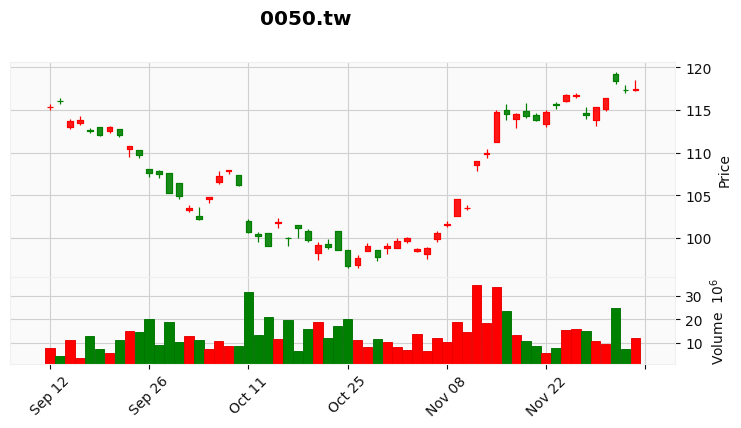

In [7]:
#Draw K-line chart
mc = mpf.make_marketcolors(up='r', down='g', inherit=True) # Customize chart appearance and set k-line chart colors
exterior = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc) # Save the chart appearance
#For detailed settings, please refer to [https://pypi.org/project/mplfinance/]

#volume controls whether prices are displayed below
k_plot = mpf.plot(df2, style=exterior, type='candle', volume=True, figratio=(30,14), figscale=0.75, title='0050.tw',)

# <p style="text-align:center" color="red"><span style="color:red">Ta-Lib Implementation</span></p>

＊View category function [ http://mrjbq7.github.io/ta-lib/doc_index.html ]



```
# You can print(function_list) to see all functions
function_list= talib.get_function_groups()
# View function categories
function_list.keys()
```



In [8]:
# Parameter setting: timeperiod: the number of days parameter, you can freely set the number of days, the default is 14

_adx = talib.ADX(df.High, df.Low, df.Close, timeperiod = 7)

_rsi = talib.RSI(df.Close,  timeperiod = 7)

_dema = talib.DEMA(df.Close, timeperiod=30)

In [9]:
# Average Directional Index (ADX)
# ADX above 30 means the price has entered a trend. And below 30 means that the exchange rate is fluctuating within the range. When the ADX exceeds 30, the larger the reading of the ADX, the more pronounced the price trend.
_adx

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    23.930631
2021-07-26    25.923251
2021-07-27    27.981423
2021-07-28    32.696474
2021-07-29    34.881715
Length: 810, dtype: float64

In [10]:
# Relative Strength Index (RSI)
# The value calculated from the average increase and average decrease of a stock price, which is an indicator of the strength or weakness of a stock price during the observation period.
# RSI = (average up/(average up + average down)) x 100
_rsi 

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    43.052091
2021-07-26    34.833045
2021-07-27    34.512735
2021-07-28    23.618134
2021-07-29    44.866997
Length: 810, dtype: float64

In [11]:
# Double Exponential Moving Average (DEMA)
# DEMA = 2 * N-Day EMA - EMA of N-Day EMA 
_dema 

Date
2018-04-02           NaN
2018-04-03           NaN
2018-04-09           NaN
2018-04-10           NaN
2018-04-11           NaN
                 ...    
2021-07-23    138.904710
2021-07-26    138.651695
2021-07-27    138.414866
2021-07-28    137.930754
2021-07-29    137.772730
Length: 810, dtype: float64

# <p style="text-align:center" color="red"><span style="color:red">Data Processing</span></p>

In [12]:
# axis = 0 for Down , axis = 1 for across
# inplace = True means operate directly from the DataFrame 
df.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1, inplace=True) 

In [13]:
df.head(3)

,Close
Date,
2018-04-02,82.250000
2018-04-03,81.500000
2018-04-09,82.199997


Q : Diviser le dataset df en 80% d'entrainement et 20% de test 

In [14]:
split_point = int(len(df)*0.8) # Divide the df dataset into 80% training and 20% testing
train = df.iloc[:split_point].copy()
test = df.iloc[split_point:].copy()

# You can also cut by date
'''
split_date = pd.Timestamp('2020-11-26') #Taiwan's entire country is on Level 3 alert
train = df.loc[:split_date]
test1 = df.loc[split_date:]
'''

"\nsplit_date = pd.Timestamp('2020-11-26') #Taiwan's entire country is on Level 3 alert\ntrain = df.loc[:split_date]\ntest1 = df.loc[split_date:]\n"

In [15]:
# Data normalization
scaler = MinMaxScaler(feature_range=(-1, 1))

#If the data is not one-dimensional, we need to reshape the data and adjust it to (data length,1) 

train_set= train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train_set)

test_set= test.values.reshape(-1,1)
test_sc = scaler.fit_transform(test_set)

In [16]:
predict_days = 1 
X_train = train_sc[:-predict_days]
y_train = train_sc[predict_days:]
X_test = test_sc[:-predict_days]
y_test = test_sc[predict_days:]

In [17]:
#Verify the shape of the dataset, it's important! 
#You can tell others the size of the training set and the dataset
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(647, 1, 1) (647, 1) (161, 1, 1) (161, 1)


# <p style="text-align:center" color="red"><span style="color:red">Build the model</span></p>

> Model fit tunable parameters.
>- **epochs** (iterations): number of training sessions 
>- **batch_size** : how many data are entered at a time  
>- **verbose** (progress bar mode): 0, 1, 2 modes to choose from
>- **callbacks** (callback function): refer to this page [https://keras.io/zh/callbacks/]

In [18]:
# Build LSTM model
lstm_model = Sequential()

#LSTM : neurons (units) 
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1],1)))

# Forgetting layer : Dropout forgetting rate can be adjusted
lstm_model.add(Dropout(0.2))

# Output layer : Number of output data
lstm_model.add(Dense(1))

#loss : Loss function
#optimizer : Optimizer
#metrics : Evaluation metrics
#The rest of the function settings can be found at [ https://www.tensorflow.org/api_docs/python/tf/keras/Model ]

lstm_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

#Use EarlyStopping to avoid wasting time
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history_lstm_model = lstm_model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2, shuffle=True, callbacks=[early_stop])

Epoch 1/20
647/647 - 2s - loss: 0.0375 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 2/20
647/647 - 1s - loss: 0.0038 - accuracy: 0.0031 - 639ms/epoch - 988us/step
Epoch 3/20
647/647 - 1s - loss: 0.0035 - accuracy: 0.0031 - 617ms/epoch - 954us/step
Epoch 4/20
647/647 - 1s - loss: 0.0034 - accuracy: 0.0031 - 648ms/epoch - 1ms/step
Epoch 5/20
647/647 - 1s - loss: 0.0033 - accuracy: 0.0031 - 616ms/epoch - 953us/step
Epoch 6/20
647/647 - 1s - loss: 0.0031 - accuracy: 0.0031 - 621ms/epoch - 959us/step
Epoch 7/20
647/647 - 1s - loss: 0.0032 - accuracy: 0.0031 - 605ms/epoch - 935us/step
Epoch 8/20
647/647 - 1s - loss: 0.0032 - accuracy: 0.0031 - 607ms/epoch - 938us/step
Epoch 8: early stopping


# <p style="text-align:center" color="red"><span style="color:red">Model training visualization</span></p>

In [19]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


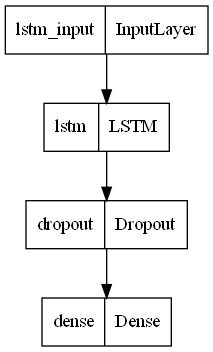

In [20]:
plot_model(lstm_model, 'model.png')

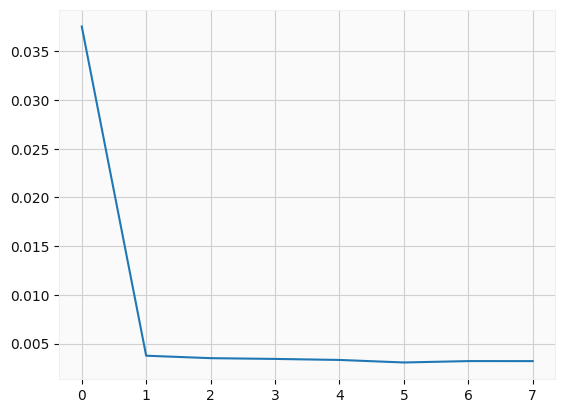

In [21]:
plt.plot(history_lstm_model.history['loss'])

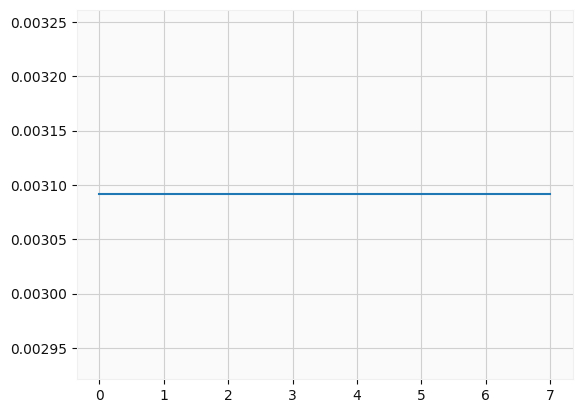

In [22]:
plt.plot(history_lstm_model.history['accuracy'])

# <p style="text-align:center" color="red"><span style="color:red">Model Prediction</span></p>

6/6 [==============================] - 0s 2ms/step


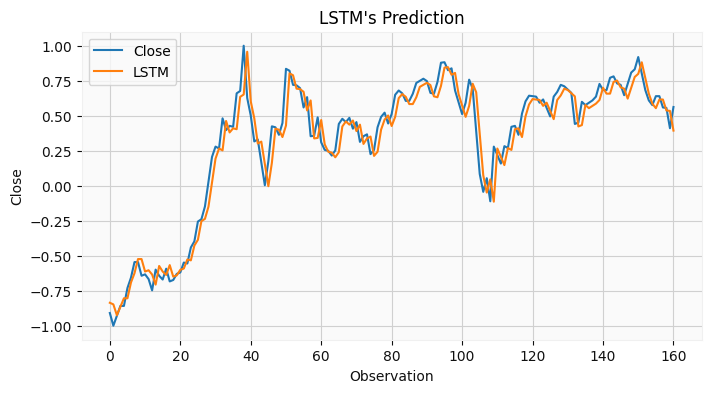

In [23]:
y_pred_test_lstm = lstm_model.predict(X_test) #Predict
plt.figure(figsize=(8, 4))
plt.plot(y_test[:,0], label='Close')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close')
plt.legend()
plt.show();

In [24]:
# Restore the normalized data
reduction_Lstm_pred = scaler.inverse_transform(y_pred_test_lstm)
reduction_test = df.iloc[split_point:].copy()
reduction_y_test = reduction_test[predict_days:]

# <p style="text-align:center" color="red"><span style="color:red">Modele evaluation</span></p>

> There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are: 

>- **Mean Squared Error** (MSE). 
>- **Root Mean Squared Error** (RMSE). 
>- **Mean Absolute Error** (MAE)

In [25]:
print("Mean Absolute Error:", mean_absolute_error(reduction_y_test, reduction_Lstm_pred))
print('Mean Squared Error:', mean_squared_error(reduction_y_test, reduction_Lstm_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(reduction_y_test, reduction_Lstm_pred)))
print("Coefficient of Determination:", r2_score(reduction_y_test, reduction_Lstm_pred))

Mean Absolute Error: 1.2518793899820457
Mean Squared Error: 2.898456343312268
Root Mean Squared Error: 1.7024853430535805
Coefficient of Determination: 0.9439186962991296


Notebook made by [@labriji_saad](https://www.linkedin.com/in/labrijisaad/) during the data science class.